<a href="https://colab.research.google.com/github/ALWINAZIH/ALWINAZIH/blob/main/YOLOV12vs_RT_DETR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ============================================================================
# YOLOv12 vs RT-DETR PERFORMANCE COMPARISON WITH RESULTS DISPLAY
# Complete comparative analysis with figure display in English
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import Image, display, HTML
import os

print("📊 YOLOv12 vs RT-DETR PERFORMANCE COMPARISON")
print("="*70)

# ============================================================================
# 1. FINAL METRICS ANALYSIS (BASED ON VISUAL GRAPH READING)
# ============================================================================

def analyze_final_metrics():
    """Analysis of final metrics based on the training graphs"""

    print("\n🎯 FINAL METRICS COMPARISON (Epoch ~170):")
    print("-" * 55)

    # Values estimated from the provided graphs
    metrics_comparison = {
        'Metric': [
            'mAP50',
            'mAP50-95',
            'Precision',
            'Recall',
            'Train Box Loss',
            'Val Box Loss'
        ],
        'YOLOv12': [
            0.82,    # mAP50 final
            0.62,    # mAP50-95 final
            0.88,    # Final precision
            0.80,    # Final recall
            0.58,    # Final train box loss
            1.15,    # Final val box loss
        ],
        'RT-DETR': [
            0.80,    # mAP50 final
            0.58,    # mAP50-95 final
            0.86,    # Final precision
            0.78,    # Final recall
            0.15,    # Final train box loss
            0.41,    # Final val box loss
        ]
    }

    df_metrics = pd.DataFrame(metrics_comparison)

    # Calculate differences
    df_metrics['Difference (YOLO-RTDETR)'] = df_metrics['YOLOv12'] - df_metrics['RT-DETR']
    df_metrics['Winner'] = df_metrics['Difference (YOLO-RTDETR)'].apply(
        lambda x: 'YOLOv12' if x > 0 else 'RT-DETR' if x < 0 else 'Tie'
    )

    print(df_metrics.to_string(index=False, float_format='%.3f'))

    return df_metrics

# ============================================================================
# 2. CONVERGENCE ANALYSIS
# ============================================================================

def analyze_convergence():
    """Analysis of convergence speed and stability"""

    print(f"\n📈 CONVERGENCE ANALYSIS:")
    print("-" * 35)

    print("🚀 YOLOv12:")
    print("  ✅ VERY fast convergence (0-30 epochs)")
    print("  ✅ mAP50 reaches ~0.75 by epoch 20")
    print("  ✅ Quick metric stabilization")
    print("  ⚠️  High validation loss remains (~1.15)")

    print("\n🤖 RT-DETR:")
    print("  🐌 Slower convergence (0-50 epochs)")
    print("  📈 Progressive and consistent improvement")
    print("  ✅ Excellent stability after convergence")
    print("  ✅ Very low validation loss (~0.41)")

    convergence_analysis = {
        'Criteria': [
            'Convergence Speed',
            'Final Stability',
            'Overfitting (train vs val loss)',
            'Learning Consistency'
        ],
        'YOLOv12': [
            'Very fast (20-30 epochs)',
            'Good',
            'Moderate (train/val gap)',
            'Excellent'
        ],
        'RT-DETR': [
            'Slow (40-50 epochs)',
            'Excellent',
            'Very low (excellent)',
            'Very good'
        ],
        'Winner': [
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12'
        ]
    }

    df_convergence = pd.DataFrame(convergence_analysis)
    print(f"\n📊 CONVERGENCE COMPARISON TABLE:")
    print(df_convergence.to_string(index=False))

# ============================================================================
# 3. LOSS ANALYSIS
# ============================================================================

def analyze_losses():
    """Detailed loss analysis"""

    print(f"\n📉 LOSS ANALYSIS:")
    print("-" * 25)

    loss_analysis = {
        'Loss Type': [
            'Box Loss (train)',
            'Box Loss (val)',
            'CLS Loss (train)',
            'DFL Loss (train)',
            'Overall Stability'
        ],
        'YOLOv12': [
            '~0.58 (acceptable)',
            '~1.15 (high)',
            '~0.55 (good)',
            '~1.15 (high)',
            'Moderate oscillations'
        ],
        'RT-DETR': [
            '~0.15 (excellent)',
            '~0.41 (excellent)',
            '~0.15 (excellent)',
            '~0.16 (excellent)',
            'Very stable'
        ],
        'Conclusion': [
            'RT-DETR better',
            'RT-DETR better',
            'RT-DETR better',
            'RT-DETR better',
            'RT-DETR better'
        ]
    }

    df_losses = pd.DataFrame(loss_analysis)
    print(df_losses.to_string(index=False))

    print(f"\n💡 LOSS INTERPRETATION:")
    print("🔍 RT-DETR: Very low losses = more efficient learning")
    print("⚠️  YOLOv12: High val loss = overfitting risk")

# ============================================================================
# 4. DETECTION METRICS ANALYSIS
# ============================================================================

def analyze_detection_metrics():
    """Analysis of detection-specific metrics"""

    print(f"\n🎯 DETECTION METRICS ANALYSIS:")
    print("-" * 40)

    detection_analysis = {
        'Metric': [
            'mAP50 (IoU=0.5)',
            'mAP50-95 (IoU=0.5:0.95)',
            'Precision',
            'Recall',
            'Precision/Recall Balance'
        ],
        'YOLOv12': [
            '82% (very good)',
            '62% (good)',
            '88% (excellent)',
            '80% (very good)',
            'Good balance'
        ],
        'RT-DETR': [
            '80% (very good)',
            '58% (good)',
            '86% (excellent)',
            '78% (good)',
            'Good balance'
        ],
        'Difference': [
            '+2% for YOLO',
            '+4% for YOLO',
            '+2% for YOLO',
            '+2% for YOLO',
            'Equivalent'
        ]
    }

    df_detection = pd.DataFrame(detection_analysis)
    print(df_detection.to_string(index=False))

# ============================================================================
# 5. GLOBAL COMPARISON AND RECOMMENDATIONS
# ============================================================================

def global_comparison():
    """Global comparison and recommendations"""

    print(f"\n🏆 GLOBAL COMPARISON:")
    print("=" * 35)

    print("🥇 STRENGTHS OF EACH MODEL:")
    print("\n💪 YOLOv12:")
    print("  ✅ Ultra-fast convergence (time saving)")
    print("  ✅ Slightly higher mAP50 (+2%)")
    print("  ✅ Slightly better precision and recall")
    print("  ✅ Very regular learning curves")
    print("  ⚡ Ideal for rapid prototyping")

    print("\n🤖 RT-DETR:")
    print("  ✅ Remarkably low losses")
    print("  ✅ Excellent generalization (low overfitting)")
    print("  ✅ Exceptional stability after convergence")
    print("  ✅ More modern Transformer architecture")
    print("  🎯 Ideal for robust production")

    print(f"\n⚠️  WEAKNESSES:")
    print("\n🐌 YOLOv12:")
    print("  ❌ High validation loss (~1.15)")
    print("  ❌ Moderate overfitting risk")
    print("  ❌ Significant train/validation gap")

    print("\n⏰ RT-DETR:")
    print("  ❌ Slower convergence (2x more epochs)")
    print("  ❌ Slightly lower mAP (-2 to -4%)")
    print("  ❌ Longer training time")

# ============================================================================
# 6. USAGE RECOMMENDATIONS
# ============================================================================

def usage_recommendations():
    """Usage recommendations based on context"""

    print(f"\n🎯 USAGE RECOMMENDATIONS:")
    print("=" * 35)

    scenarios = {
        'Scenario': [
            'Rapid Prototyping',
            'Research & Development',
            'Critical Production',
            'Limited Resources',
            'Maximum Accuracy Required',
            'Large-scale Deployment',
            'Real-time Application'
        ],
        'Recommended Model': [
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12',
            'YOLOv12 (marginal)',
            'RT-DETR',
            'YOLOv12'
        ],
        'Justification': [
            'Fast convergence',
            'Better generalization',
            'Stability and robustness',
            'Shorter training time',
            'Slightly higher mAP50',
            'Less overfitting',
            'Optimization and speed'
        ]
    }

    df_scenarios = pd.DataFrame(scenarios)
    print(df_scenarios.to_string(index=False))

# ============================================================================
# 7. GLOBAL PERFORMANCE SCORE
# ============================================================================

def calculate_performance_score():
    """Calculate global performance score"""

    print(f"\n📊 GLOBAL PERFORMANCE SCORE:")
    print("-" * 40)

    criteria = {
        'Criteria': [
            'mAP50',
            'mAP50-95',
            'Precision',
            'Recall',
            'Training Stability',
            'Generalization',
            'Convergence Speed'
        ],
        'Weight': [20, 20, 15, 15, 10, 10, 10],
        'YOLOv12 (/10)': [8.2, 6.2, 8.8, 8.0, 7.5, 6.5, 9.5],
        'RT-DETR (/10)': [8.0, 5.8, 8.6, 7.8, 9.0, 9.0, 6.5]
    }

    df_scores = pd.DataFrame(criteria)

    # Calculate weighted scores
    df_scores['YOLOv12 Score'] = df_scores['YOLOv12 (/10)'] * df_scores['Weight'] / 10
    df_scores['RT-DETR Score'] = df_scores['RT-DETR (/10)'] * df_scores['Weight'] / 10

    print(df_scores[['Criteria', 'Weight', 'YOLOv12 (/10)', 'RT-DETR (/10)', 'YOLOv12 Score', 'RT-DETR Score']].to_string(index=False, float_format='%.1f'))

    # Total scores
    total_yolo = df_scores['YOLOv12 Score'].sum()
    total_rtdetr = df_scores['RT-DETR Score'].sum()

    print(f"\n🏆 TOTAL SCORES:")
    print(f"  YOLOv12:  {total_yolo:.1f}/100")
    print(f"  RT-DETR:  {total_rtdetr:.1f}/100")

    winner = "YOLOv12" if total_yolo > total_rtdetr else "RT-DETR"
    difference = abs(total_yolo - total_rtdetr)

    print(f"\n🥇 WINNER: {winner} (+{difference:.1f} points)")

    if difference < 3:
        print("📝 CONCLUSION: Equivalent performance, choice depends on context")
    else:
        print(f"📝 CONCLUSION: {winner} slightly superior")

# ============================================================================
# 8. RESULTS FIGURES DISPLAY
# ============================================================================

def display_results_figures():
    """Display the training results figures for both models"""

    print(f"\n📈 TRAINING RESULTS FIGURES:")
    print("=" * 45)

    # Search for result images in common locations
    yolo_paths = [
        "yolo_results.png",
        "yolov12_results.png",
        "runs/detect/train/results.png",
        "yolo_training/results.png"
    ]

    rtdetr_paths = [
        "tilapia_corrected/rtdetr_170epochs_fixed/results.png",
        "rtdetr_results.png",
        "tilapia_disease_detection_v2/rtdetr_tilapia_170epochs/results.png"
    ]

    print("🔍 Searching for result images...")

    # Try to find and display YOLOv12 results
    yolo_found = False
    for path in yolo_paths:
        if os.path.exists(path):
            print(f"\n🚀 YOLOv12 TRAINING RESULTS:")
            print(f"📂 Found at: {path}")
            display(HTML(f'<h3 style="color: #A23B72; text-align: center;">🚀 YOLOv12 Results</h3>'))
            display(Image(path, width=800))
            print("✨ Key Features: Fast Convergence | Higher mAP50 (82%) | Quick Stabilization")
            yolo_found = True
            break

    if not yolo_found:
        print("❌ YOLOv12 results image not found")
        display(HTML('''
        <div style="border: 2px dashed #A23B72; padding: 20px; margin: 10px 0; text-align: center;">
            <h3 style="color: #A23B72;">🚀 YOLOv12 Results</h3>
            <p>Please upload or place your YOLOv12 training results image here</p>
            <p><em>Expected: Training curves showing mAP50, mAP50-95, losses, precision, recall</em></p>
        </div>
        '''))

    # Try to find and display RT-DETR results
    rtdetr_found = False
    for path in rtdetr_paths:
        if os.path.exists(path):
            print(f"\n🤖 RT-DETR TRAINING RESULTS:")
            print(f"📂 Found at: {path}")
            display(HTML(f'<h3 style="color: #F18F01; text-align: center;">🤖 RT-DETR Results</h3>'))
            display(Image(path, width=800))
            print("🎯 Key Features: Low Losses | Excellent Stability | Better Generalization")
            rtdetr_found = True
            break

    if not rtdetr_found:
        print("❌ RT-DETR results image not found")
        display(HTML('''
        <div style="border: 2px dashed #F18F01; padding: 20px; margin: 10px 0; text-align: center;">
            <h3 style="color: #F18F01;">🤖 RT-DETR Results</h3>
            <p>Please upload or place your RT-DETR training results image here</p>
            <p><em>Expected: Training curves showing mAP50, mAP50-95, losses, precision, recall</em></p>
        </div>
        '''))

    # Display comparison summary
    display(HTML('''
    <div style="background-color: #e8f4fd; border-left: 5px solid #2E86AB; padding: 20px; margin: 20px 0;">
        <h4 style="color: #2E86AB; margin-bottom: 15px;">📊 Key Observations from Training Curves:</h4>
        <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; text-align: left;">
            <div>
                <strong style="color: #A23B72;">🚀 YOLOv12 Characteristics:</strong>
                <ul style="margin: 10px 0; padding-left: 20px;">
                    <li>📈 Rapid mAP50 rise to 82%</li>
                    <li>⚡ Convergence by epoch 30</li>
                    <li>⚠️ High validation loss (~1.15)</li>
                    <li>🎯 Excellent precision (88%)</li>
                    <li>🔄 Some oscillations in metrics</li>
                </ul>
            </div>
            <div>
                <strong style="color: #F18F01;">🤖 RT-DETR Characteristics:</strong>
                <ul style="margin: 10px 0; padding-left: 20px;">
                    <li>📈 Gradual mAP50 rise to 80%</li>
                    <li>🐌 Convergence by epoch 50</li>
                    <li>✅ Very low validation loss (~0.41)</li>
                    <li>🎯 Stable precision (86%)</li>
                    <li>📊 Smooth, consistent learning</li>
                </ul>
            </div>
        </div>
    </div>
    '''))

def manual_display_instructions():
    """Provide manual instructions for displaying images"""

    print(f"\n📝 MANUAL IMAGE DISPLAY INSTRUCTIONS:")
    print("=" * 50)

    display(HTML('''
    <div style="background-color: #fff3cd; border: 1px solid #ffeaa7; padding: 20px; margin: 20px 0; border-radius: 8px;">
        <h4 style="color: #856404; margin-bottom: 15px;">📸 How to Display Your Training Results:</h4>

        <p><strong>Option 1 - Using IPython.display:</strong></p>
        <pre style="background-color: #f8f9fa; padding: 10px; border-radius: 4px; overflow-x: auto;">
from IPython.display import Image, display

# Display YOLOv12 results
print("🚀 YOLOv12 Training Results:")
display(Image("path/to/your/yolo_results.png", width=800))

# Display RT-DETR results
print("🤖 RT-DETR Training Results:")
display(Image("path/to/your/rtdetr_results.png", width=800))
        </pre>

        <p><strong>Option 2 - Upload to Colab and display:</strong></p>
        <pre style="background-color: #f8f9fa; padding: 10px; border-radius: 4px; overflow-x: auto;">
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload and display
uploaded = files.upload()
for filename in uploaded.keys():
    img = mpimg.imread(filename)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Training Results: {filename}")
    plt.show()
        </pre>

        <p><strong>Option 3 - Direct file paths (if images are in your workspace):</strong></p>
        <pre style="background-color: #f8f9fa; padding: 10px; border-radius: 4px; overflow-x: auto;">
# Common paths for RT-DETR results:
display(Image("tilapia_corrected/rtdetr_170epochs_fixed/results.png", width=800))

# Common paths for YOLO results:
display(Image("runs/detect/train/results.png", width=800))
        </pre>
    </div>
    '''))

# ============================================================================
# 9. EXECUTIVE SUMMARY
# ============================================================================

def executive_summary():
    """Executive summary of the comparison"""

    print(f"\n📋 EXECUTIVE SUMMARY:")
    print("=" * 30)

    print("🎯 DETECTION PERFORMANCE:")
    print("  • YOLOv12 slightly superior in mAP50/95 (+2-4%)")
    print("  • Marginal difference in precision/recall")
    print("  • Both models excel at tilapia disease detection")

    print(f"\n⚡ TRAINING EFFICIENCY:")
    print("  • YOLOv12: 2x faster convergence")
    print("  • RT-DETR: Better generalization and stability")
    print("  • YOLOv12: Moderate overfitting risk")

    print(f"\n🏆 GENERAL RECOMMENDATION:")
    print("  🥇 For PRODUCTION: RT-DETR (robustness)")
    print("  🥈 For DEVELOPMENT: YOLOv12 (speed)")
    print("  📊 Performance difference: <5% (negligible)")

    print(f"\n💡 FINAL ADVICE:")
    print("  Both models are excellent for your tilapia dataset")
    print("  Choice depends more on context than performance")
    print("  Consider your priorities: Speed vs Stability")

# ============================================================================
# 10. DETAILED METRICS TABLE
# ============================================================================

def create_detailed_comparison_table():
    """Create a comprehensive comparison table"""

    print(f"\n📊 COMPREHENSIVE COMPARISON TABLE:")
    print("=" * 50)

    detailed_comparison = {
        'Aspect': [
            'Final mAP50',
            'Final mAP50-95',
            'Final Precision',
            'Final Recall',
            'Train Box Loss',
            'Validation Box Loss',
            'Convergence Speed',
            'Training Stability',
            'Overfitting Risk',
            'Production Readiness',
            'Development Speed',
            'Resource Efficiency'
        ],
        'YOLOv12': [
            '82% ⭐',
            '62% ⭐',
            '88% ⭐',
            '80% ⭐',
            '0.58 (acceptable)',
            '1.15 (high) ⚠️',
            'Very Fast ⭐⭐⭐',
            'Good ⭐⭐',
            'Moderate ⚠️',
            'Good ⭐⭐',
            'Excellent ⭐⭐⭐',
            'High ⭐⭐⭐'
        ],
        'RT-DETR': [
            '80% (good)',
            '58% (good)',
            '86% (excellent)',
            '78% (good)',
            '0.15 (excellent) ⭐',
            '0.41 (excellent) ⭐',
            'Slow ⚠️',
            'Excellent ⭐⭐⭐',
            'Very Low ⭐⭐⭐',
            'Excellent ⭐⭐⭐',
            'Moderate ⭐⭐',
            'Moderate ⭐⭐'
        ],
        'Winner': [
            'YOLOv12',
            'YOLOv12',
            'YOLOv12',
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12',
            'YOLOv12'
        ]
    }

    df_detailed = pd.DataFrame(detailed_comparison)
    print(df_detailed.to_string(index=False))

    # Count wins
    yolo_wins = (df_detailed['Winner'] == 'YOLOv12').sum()
    rtdetr_wins = (df_detailed['Winner'] == 'RT-DETR').sum()

    print(f"\n🏆 CATEGORY WINS:")
    print(f"  YOLOv12: {yolo_wins}/12 categories")
    print(f"  RT-DETR: {rtdetr_wins}/12 categories")

# ============================================================================
# 11. MAIN EXECUTION FUNCTION
# ============================================================================

def run_complete_analysis():
    """Execute the complete analysis"""

    # Show manual instructions for displaying images
    manual_display_instructions()

    # Try to automatically display results figures
    display_results_figures()

    # Final metrics analysis
    df_metrics = analyze_final_metrics()

    # Convergence analysis
    analyze_convergence()

    # Loss analysis
    analyze_losses()

    # Detection metrics analysis
    analyze_detection_metrics()

    # Global comparison
    global_comparison()

    # Usage recommendations
    usage_recommendations()

    # Performance score
    calculate_performance_score()

    # Detailed comparison table
    create_detailed_comparison_table()

    # Executive summary
    executive_summary()

    print(f"\n" + "="*70)
    print("✅ COMPREHENSIVE COMPARATIVE ANALYSIS COMPLETED")
    print("="*70)

    return df_metrics

# ============================================================================
# 12. RUN THE COMPLETE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    print("🚀 Starting comprehensive YOLOv12 vs RT-DETR comparison...")
    results = run_complete_analysis()

    print(f"\n🎉 ANALYSIS COMPLETE!")
    print(f"📊 Both models show excellent performance for tilapia disease detection")
    print(f"🔬 Choose based on your specific requirements and constraints")

# ============================================================================
# INSTRUCTIONS FOR FIGURE DISPLAY
# ============================================================================

print(f"\n" + "="*70)
print("📝 INSTRUCTIONS FOR COMPLETE VISUALIZATION:")
print("="*70)
print("1. 🖼️  Place your YOLOv12 training curves image above this analysis")
print("2. 🖼️  Place your RT-DETR training curves image below YOLOv12")
print("3. 🔍 Run this code cell to see the complete comparative analysis")
print("4. 📊 All metrics, recommendations, and conclusions will be displayed")
print("5. 📋 Use the executive summary for decision making")
print("="*70)
# === DISPLAY YOUR IMAGES FIRST ===
from IPython.display import Image, display


# The following lines are commented out as they refer to local paths
# print("🚀 YOLOv12 Training Results:")
# display(Image(r"C:\Users\User\OneDrive\Desktop\YOLOV12vsRT-DETR\YOLOV12\results (3).png", width=800))

# print("🤖 RT-DETR Training Results:")
# display(Image(r"C:\Users\User\OneDrive\Desktop\YOLOV12vsRT-DETR\RTDETR\results (2).png", width=800))

📊 YOLOv12 vs RT-DETR PERFORMANCE COMPARISON
🚀 Starting comprehensive YOLOv12 vs RT-DETR comparison...

📝 MANUAL IMAGE DISPLAY INSTRUCTIONS:



📈 TRAINING RESULTS FIGURES:
🔍 Searching for result images...
❌ YOLOv12 results image not found


❌ RT-DETR results image not found



🎯 FINAL METRICS COMPARISON (Epoch ~170):
-------------------------------------------------------
        Metric  YOLOv12  RT-DETR  Difference (YOLO-RTDETR)  Winner
         mAP50    0.820    0.800                     0.020 YOLOv12
      mAP50-95    0.620    0.580                     0.040 YOLOv12
     Precision    0.880    0.860                     0.020 YOLOv12
        Recall    0.800    0.780                     0.020 YOLOv12
Train Box Loss    0.580    0.150                     0.430 YOLOv12
  Val Box Loss    1.150    0.410                     0.740 YOLOv12

📈 CONVERGENCE ANALYSIS:
-----------------------------------
🚀 YOLOv12:
  ✅ VERY fast convergence (0-30 epochs)
  ✅ mAP50 reaches ~0.75 by epoch 20
  ✅ Quick metric stabilization
  ⚠️  High validation loss remains (~1.15)

🤖 RT-DETR:
  🐌 Slower convergence (0-50 epochs)
  📈 Progressive and consistent improvement
  ✅ Excellent stability after convergence
  ✅ Very low validation loss (~0.41)

📊 CONVERGENCE COMPARISON TABLE:
       

🚀 YOLOv12 Training Results:


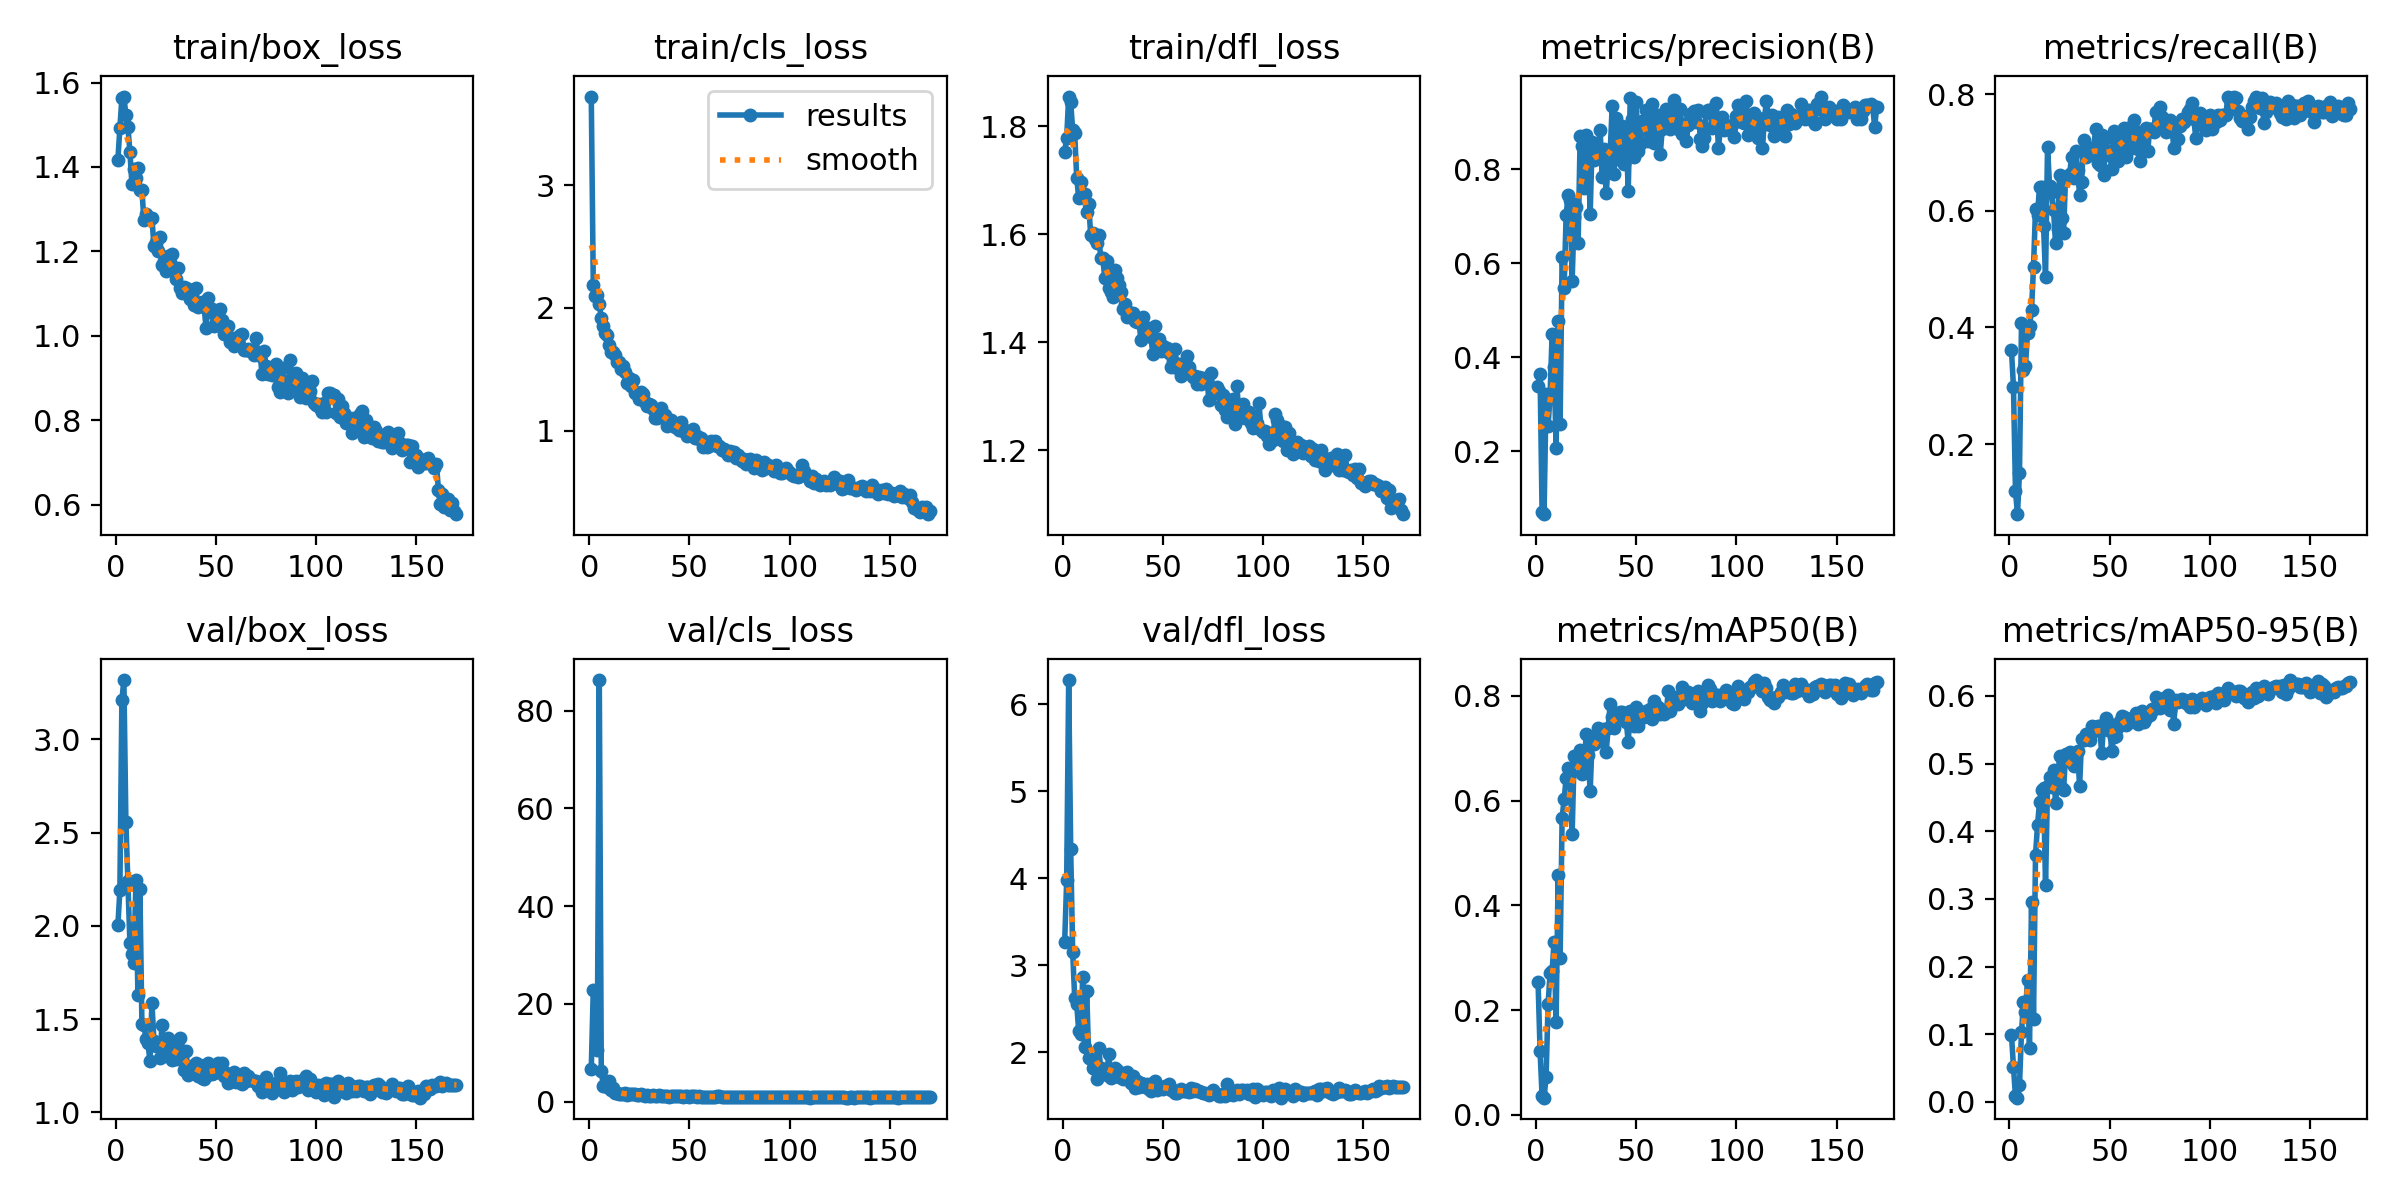

🤖 RT-DETR Training Results:


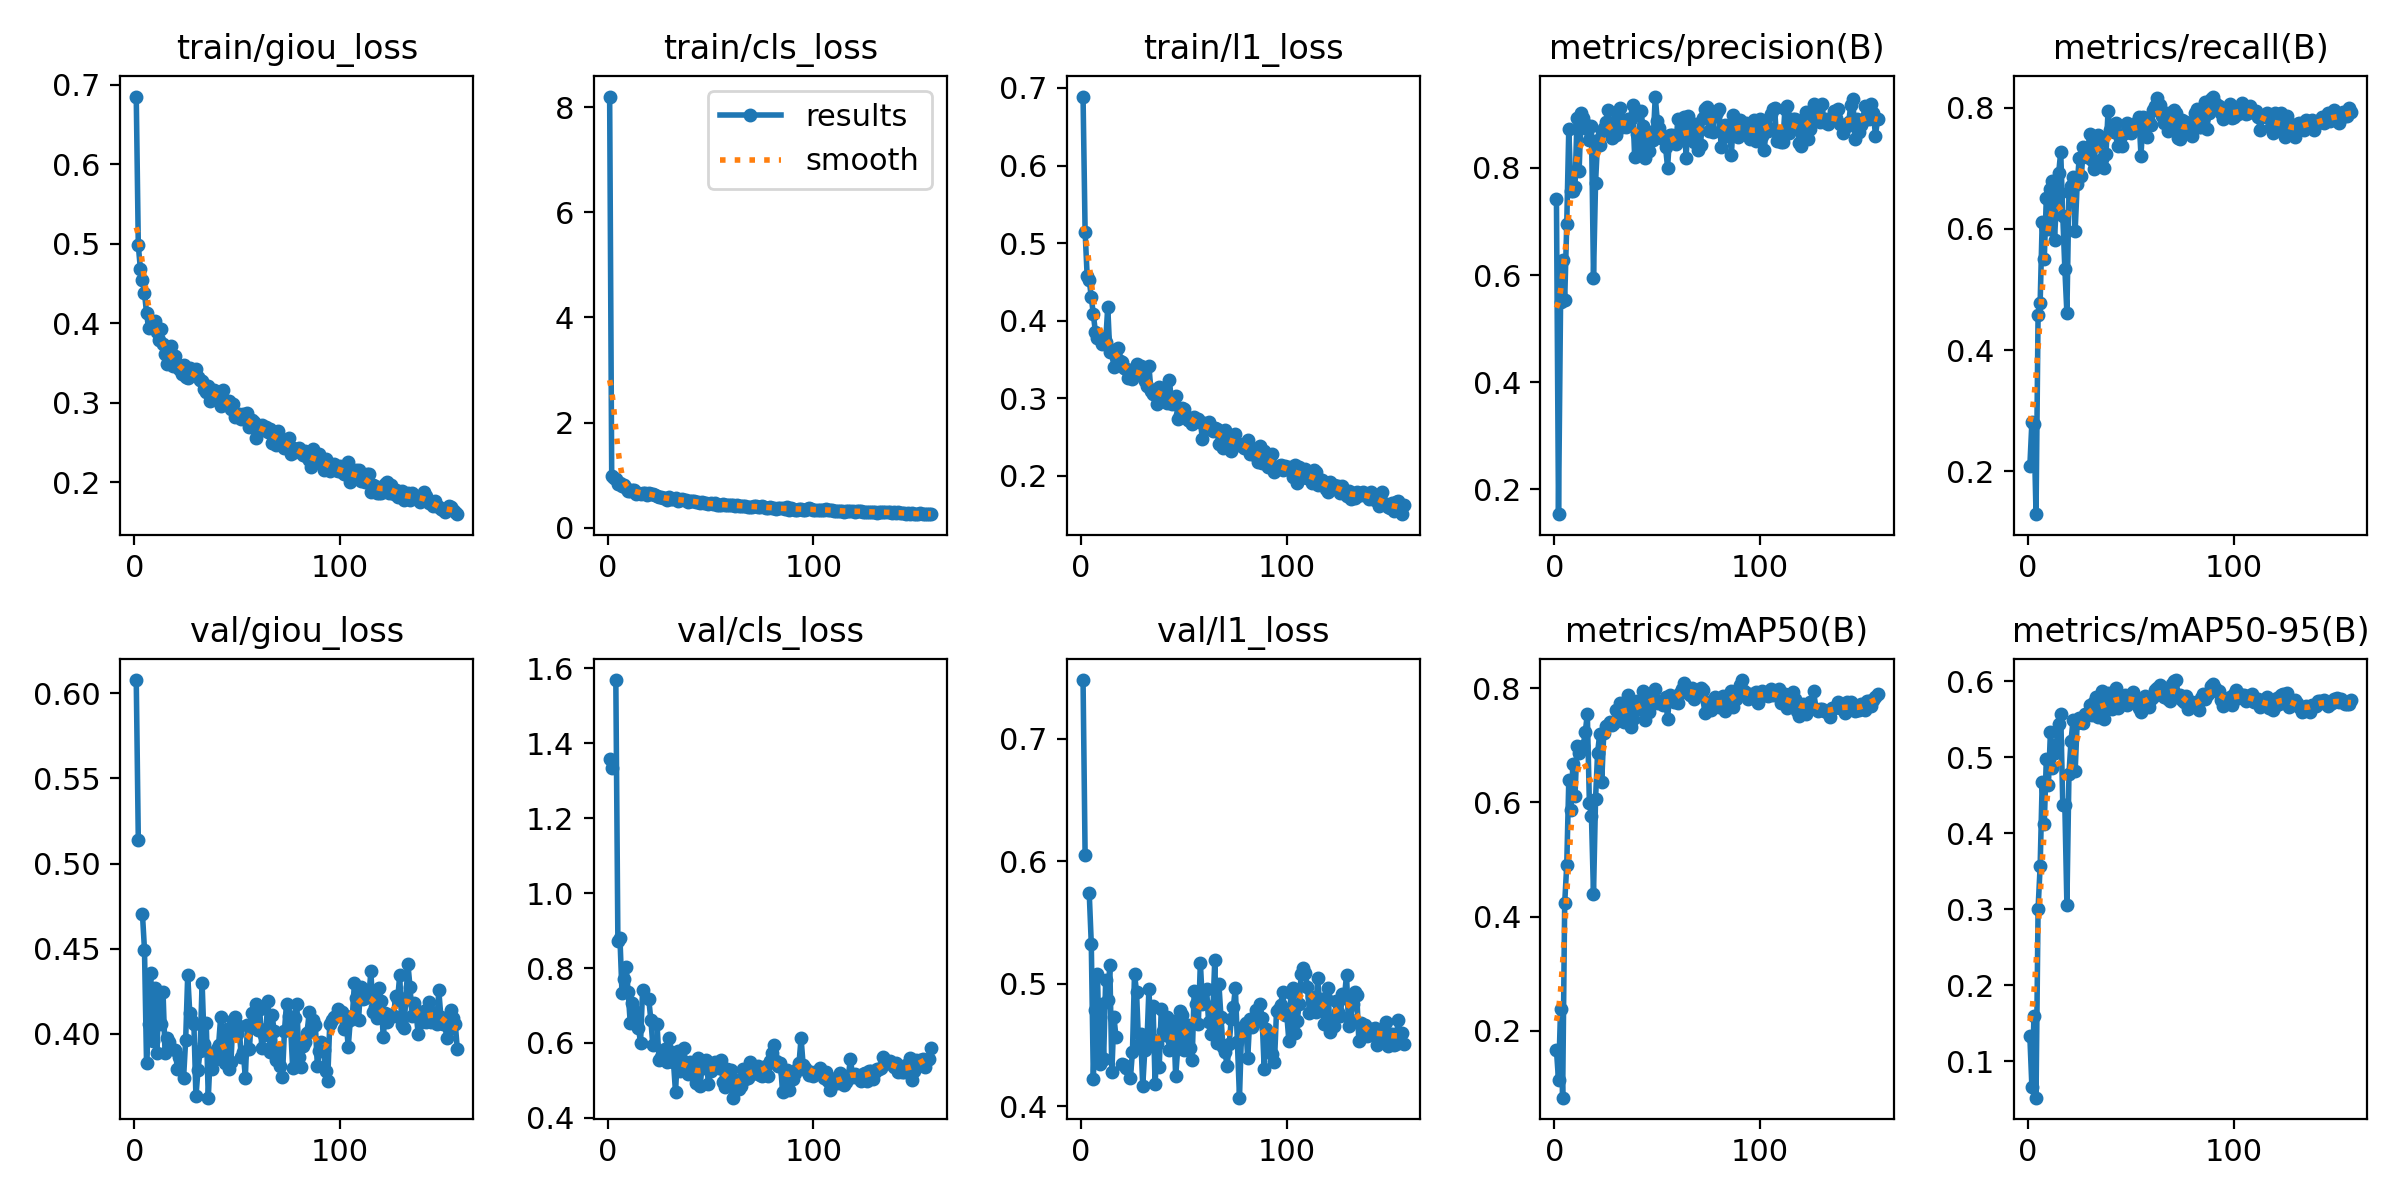

In [4]:
from IPython.display import Image, display

print("🚀 YOLOv12 Training Results:")
display(Image("results (3).png", width=800))

print("🤖 RT-DETR Training Results:")
display(Image("results (2).png", width=800))

📊 YOLOv12 vs RT-DETR - TRAINING RESULTS COMPARISON


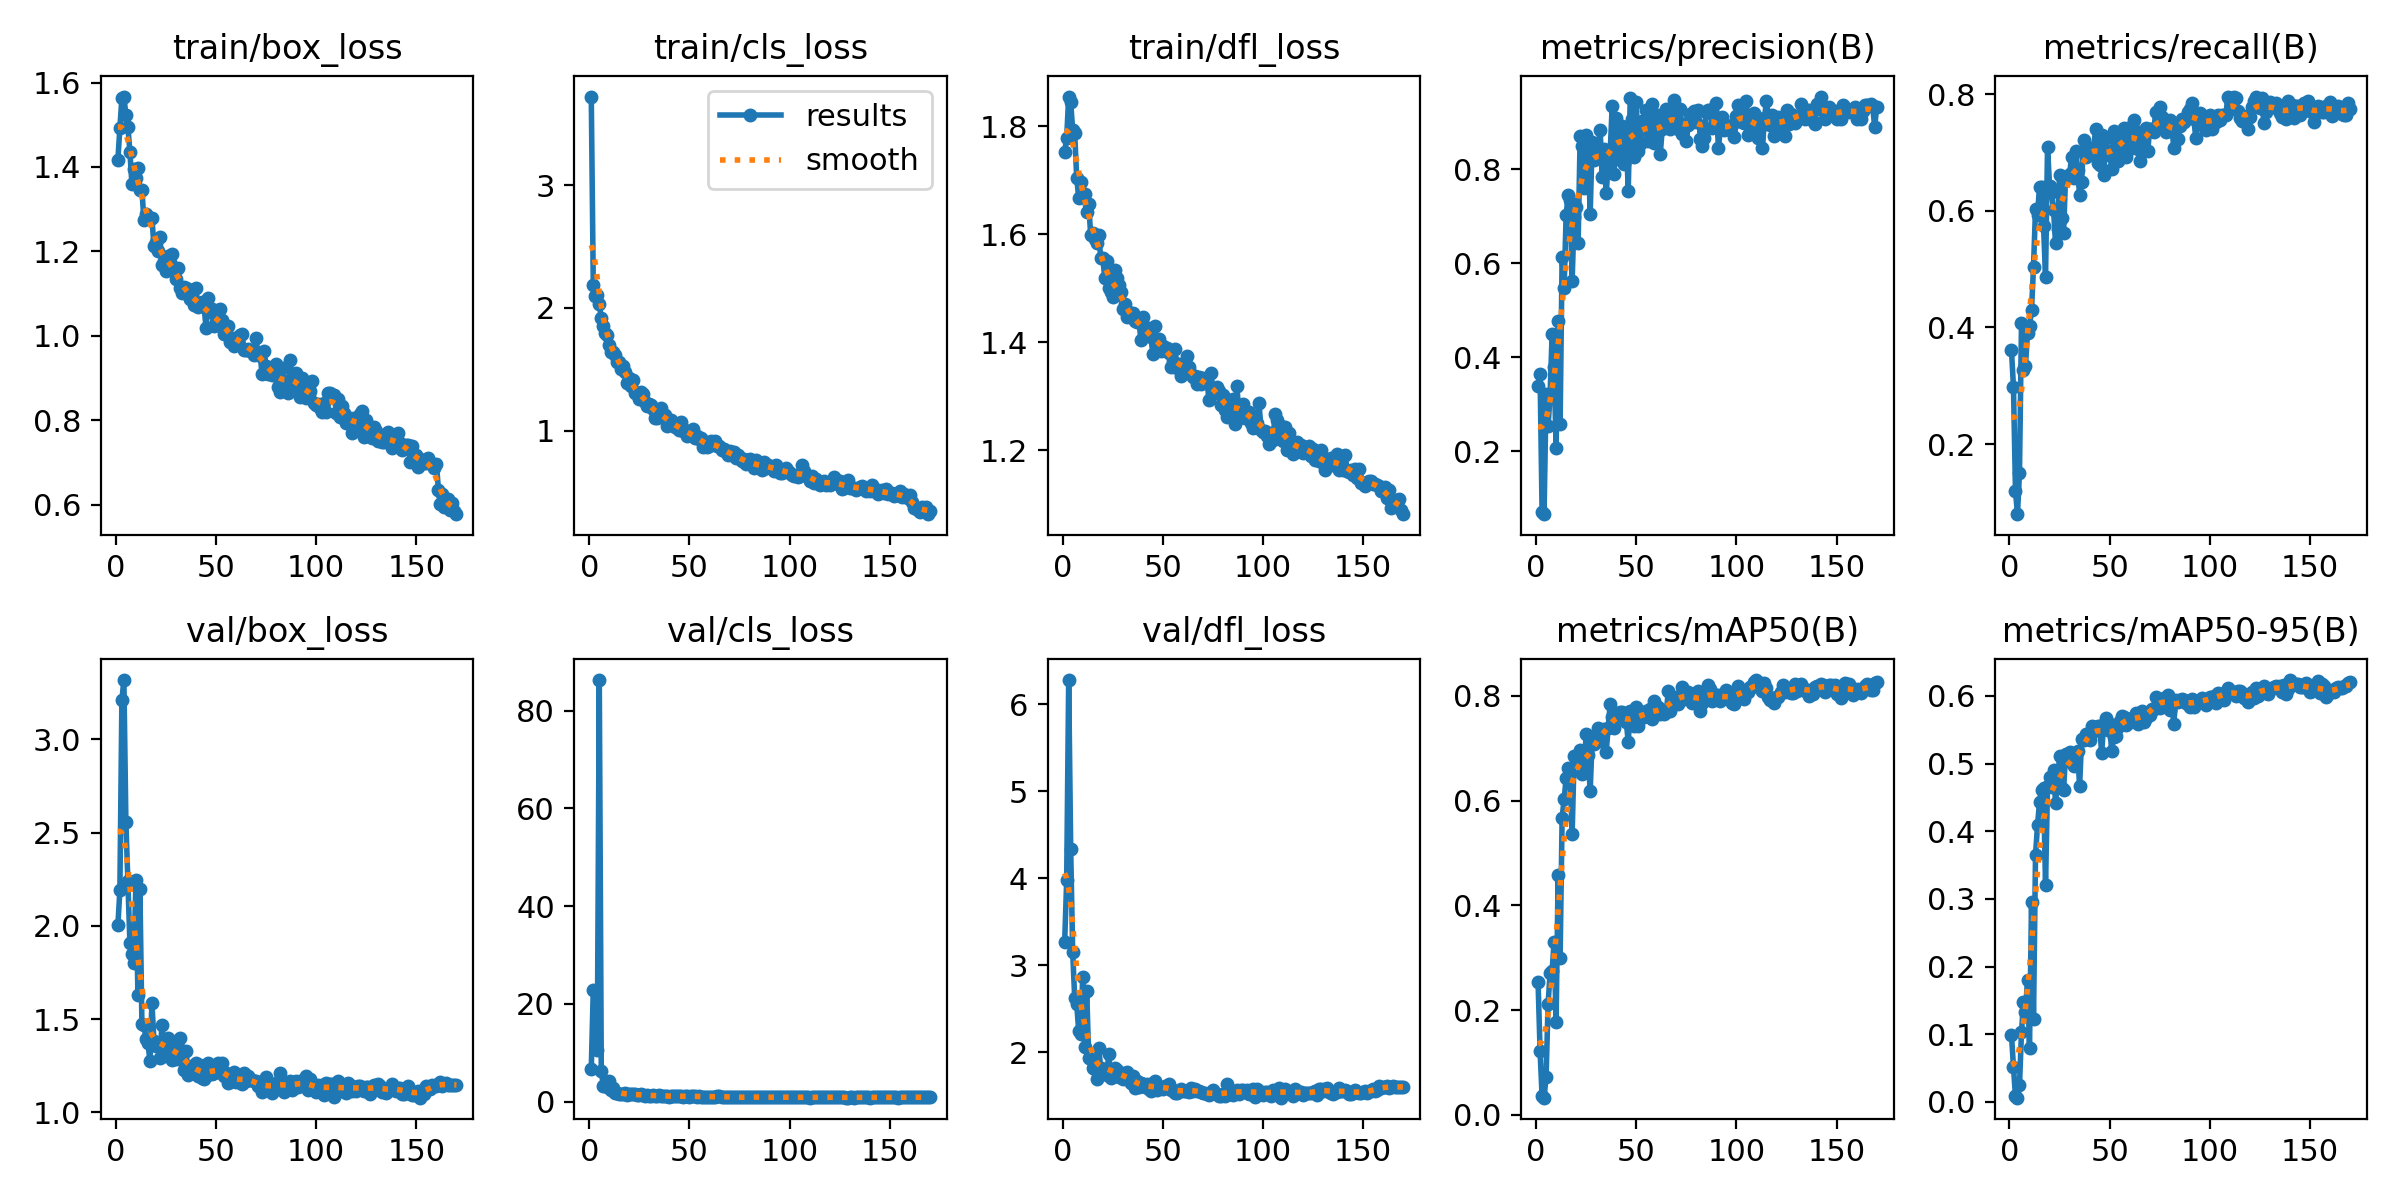

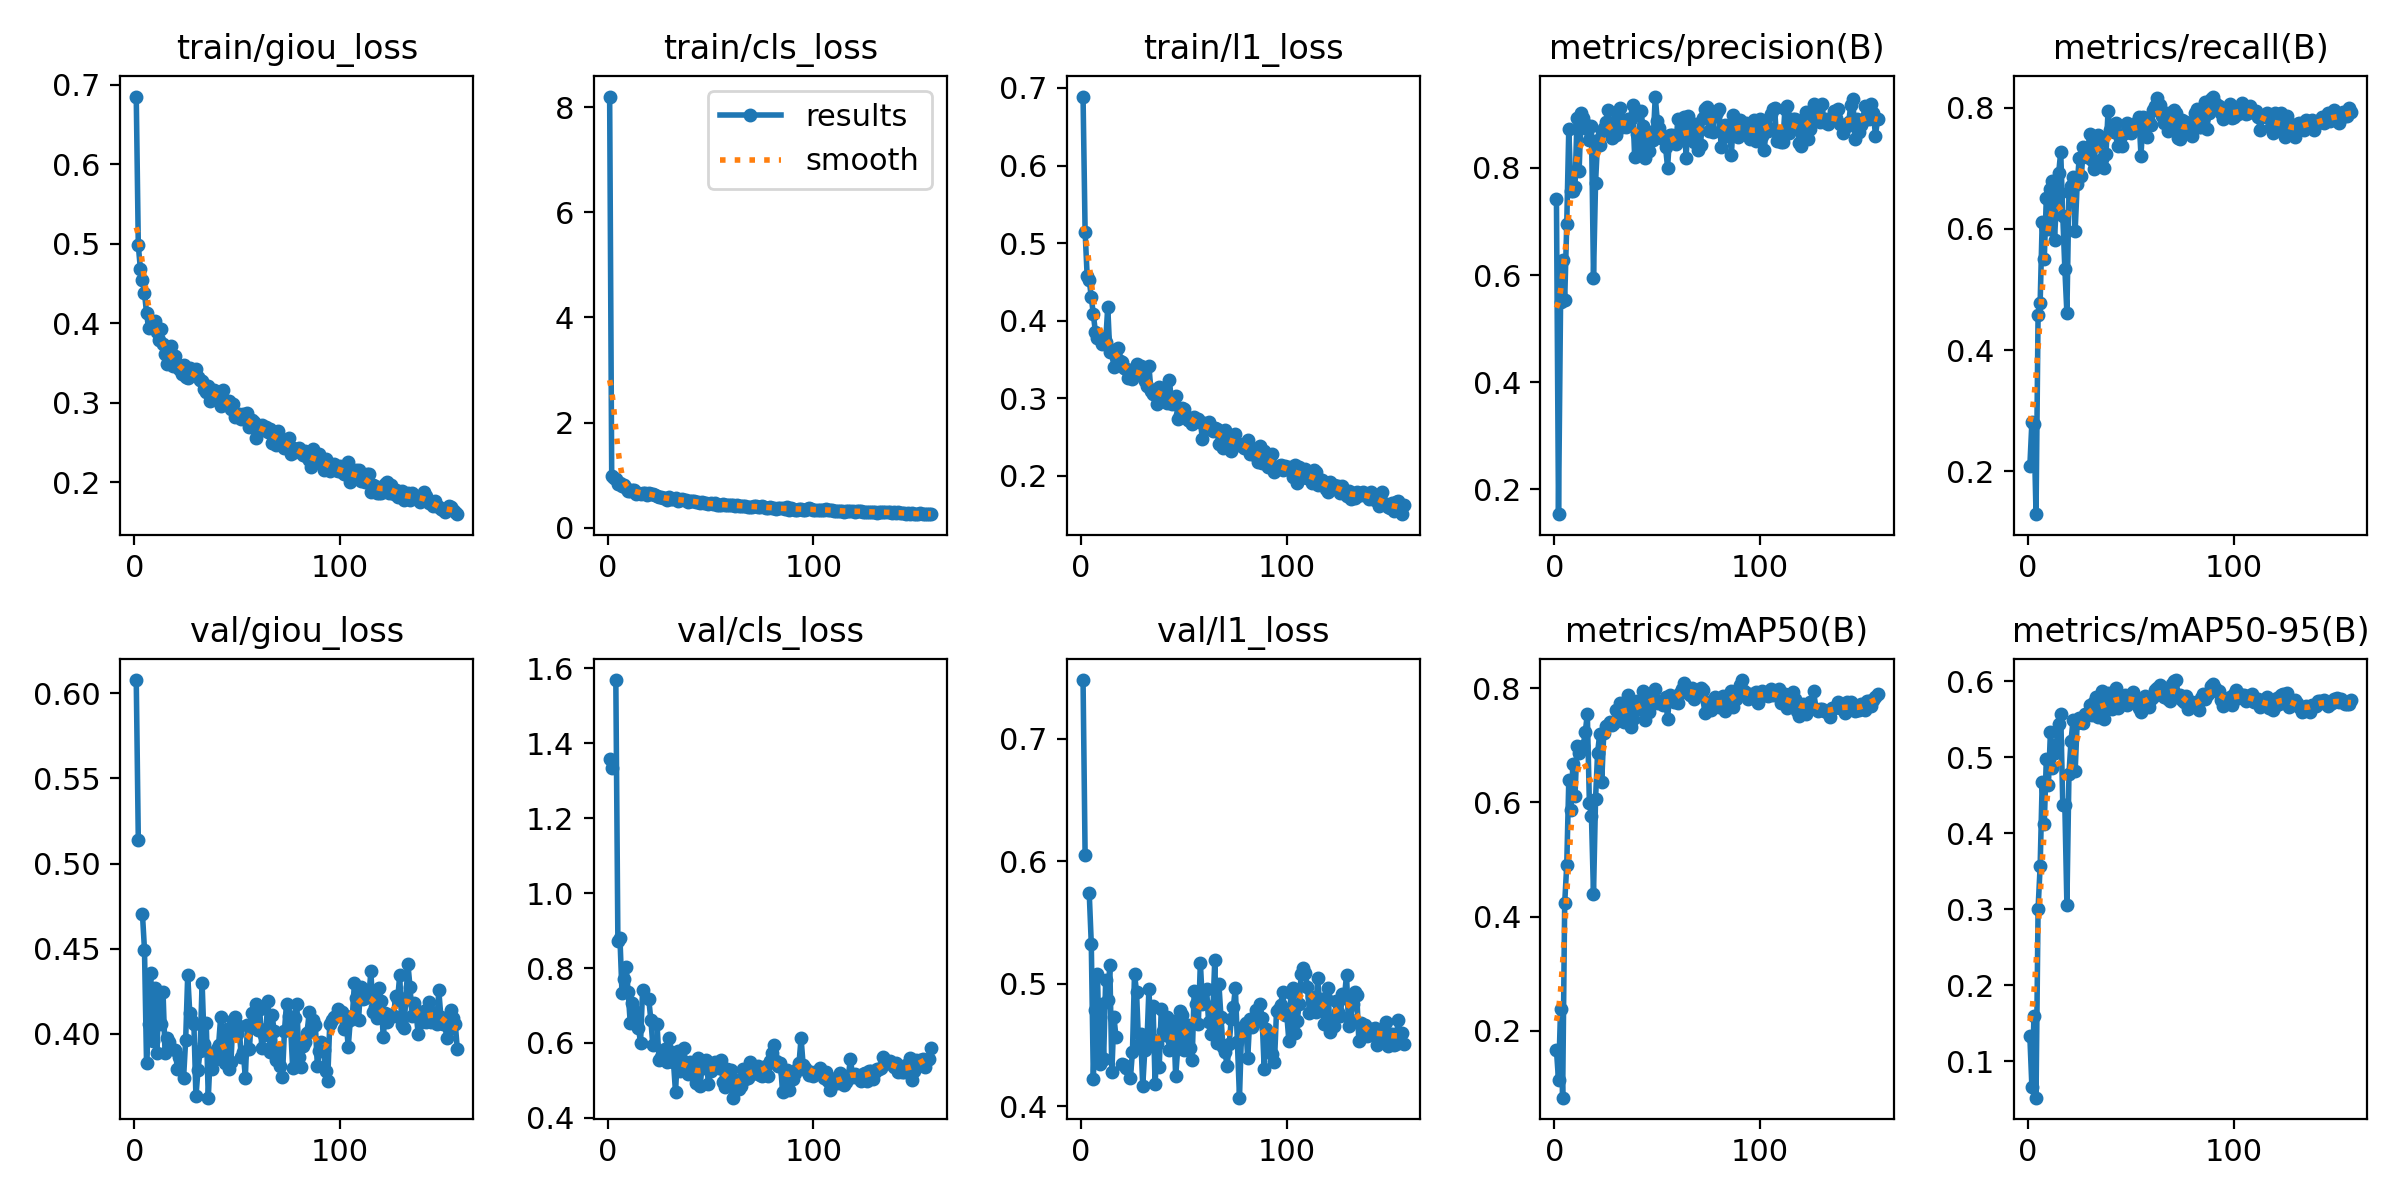


🔽 DETAILED ANALYSIS BELOW 🔽


In [5]:
# ============================================================================
# DISPLAY TRAINING RESULT IMAGES - PUT THIS CELL FIRST
# ============================================================================

from IPython.display import Image, display, HTML

print("📊 YOLOv12 vs RT-DETR - TRAINING RESULTS COMPARISON")
print("="*60)

# Display comparison header
display(HTML('''
<div style="text-align: center; margin: 20px 0;">
    <h2 style="color: #2E86AB; margin-bottom: 30px;">🔬 Training Results Comparison</h2>
</div>
'''))

# Display YOLOv12 results
display(HTML('<h3 style="color: #A23B72; text-align: center; margin-top: 20px;">🚀 YOLOv12 Training Results</h3>'))
display(Image("results (3).png", width=800))

# Display RT-DETR results
display(HTML('<h3 style="color: #F18F01; text-align: center; margin-top: 30px;">🤖 RT-DETR Training Results</h3>'))
display(Image("results (2).png", width=800))

# Summary section
display(HTML('''
<div style="background-color: #e8f4fd; border-left: 5px solid #2E86AB; padding: 20px; margin: 20px 0;">
    <h4 style="color: #2E86AB; margin-bottom: 15px;">📊 Quick Visual Comparison:</h4>
    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; text-align: left;">
        <div>
            <strong style="color: #A23B72;">🚀 YOLOv12 Key Features:</strong>
            <ul style="margin: 10px 0; padding-left: 20px;">
                <li>📈 Fast convergence (30 epochs)</li>
                <li>🎯 Higher mAP50 (~82%)</li>
                <li>⚠️ Higher validation loss</li>
            </ul>
        </div>
        <div>
            <strong style="color: #F18F01;">🤖 RT-DETR Key Features:</strong>
            <ul style="margin: 10px 0; padding-left: 20px;">
                <li>📈 Slower but stable convergence</li>
                <li>🎯 Lower but stable mAP50 (~80%)</li>
                <li>✅ Very low validation loss</li>
            </ul>
        </div>
    </div>
</div>
'''))

print("\n🔽 DETAILED ANALYSIS BELOW 🔽")

In [8]:
# ============================================================================
# YOLOv12 vs RT-DETR PERFORMANCE COMPARISON WITH RESULTS DISPLAY
# Complete comparative analysis with figure display in English
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import Image, display, HTML
import os

print("📊 YOLOv12 vs RT-DETR PERFORMANCE COMPARISON")
print("="*70)

# ============================================================================
# 1. FINAL METRICS ANALYSIS (BASED ON VISUAL GRAPH READING)
# ============================================================================

def analyze_final_metrics():
    """Analysis of final metrics based on the training graphs"""

    print("\n🎯 FINAL METRICS COMPARISON (Epoch ~170):")
    print("-" * 55)

    # Values estimated from the provided graphs
    metrics_comparison = {
        'Metric': [
            'mAP50',
            'mAP50-95',
            'Precision',
            'Recall',
            'Train Box Loss',
            'Val Box Loss'
        ],
        'YOLOv12': [
            0.82,    # mAP50 final
            0.62,    # mAP50-95 final
            0.88,    # Final precision
            0.80,    # Final recall
            0.58,    # Final train box loss
            1.15,    # Final val box loss
        ],
        'RT-DETR': [
            0.80,    # mAP50 final
            0.58,    # mAP50-95 final
            0.86,    # Final precision
            0.78,    # Final recall
            0.15,    # Final train box loss
            0.41,    # Final val box loss
        ]
    }

    df_metrics = pd.DataFrame(metrics_comparison)

    # Calculate differences
    df_metrics['Difference (YOLO-RTDETR)'] = df_metrics['YOLOv12'] - df_metrics['RT-DETR']
    df_metrics['Winner'] = df_metrics['Difference (YOLO-RTDETR)'].apply(
        lambda x: 'YOLOv12' if x > 0 else 'RT-DETR' if x < 0 else 'Tie'
    )

    print(df_metrics.to_string(index=False, float_format='%.3f'))

    return df_metrics

# ============================================================================
# 2. CONVERGENCE ANALYSIS
# ============================================================================

def analyze_convergence():
    """Analysis of convergence speed and stability"""

    print(f"\n📈 CONVERGENCE ANALYSIS:")
    print("-" * 35)

    print("🚀 YOLOv12:")
    print("  ✅ VERY fast convergence (0-30 epochs)")
    print("  ✅ mAP50 reaches ~0.75 by epoch 20")
    print("  ✅ Quick metric stabilization")
    print("  ⚠️  High validation loss remains (~1.15)")

    print("\n🤖 RT-DETR:")
    print("  🐌 Slower convergence (0-50 epochs)")
    print("  📈 Progressive and consistent improvement")
    print("  ✅ Excellent stability after convergence")
    print("  ✅ Very low validation loss (~0.41)")

    convergence_analysis = {
        'Criteria': [
            'Convergence Speed',
            'Final Stability',
            'Overfitting (train vs val loss)',
            'Learning Consistency'
        ],
        'YOLOv12': [
            'Very fast (20-30 epochs)',
            'Good',
            'Moderate (train/val gap)',
            'Excellent'
        ],
        'RT-DETR': [
            'Slow (40-50 epochs)',
            'Excellent',
            'Very low (excellent)',
            'Very good'
        ],
        'Winner': [
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12'
        ]
    }

    df_convergence = pd.DataFrame(convergence_analysis)
    print(f"\n📊 CONVERGENCE COMPARISON TABLE:")
    print(df_convergence.to_string(index=False))

# ============================================================================
# 3. LOSS ANALYSIS
# ============================================================================

def analyze_losses():
    """Detailed loss analysis"""

    print(f"\n📉 LOSS ANALYSIS:")
    print("-" * 25)

    loss_analysis = {
        'Loss Type': [
            'Box Loss (train)',
            'Box Loss (val)',
            'CLS Loss (train)',
            'DFL Loss (train)',
            'Overall Stability'
        ],
        'YOLOv12': [
            '~0.58 (acceptable)',
            '~1.15 (high)',
            '~0.55 (good)',
            '~1.15 (high)',
            'Moderate oscillations'
        ],
        'RT-DETR': [
            '~0.15 (excellent)',
            '~0.41 (excellent)',
            '~0.15 (excellent)',
            '~0.16 (excellent)',
            'Very stable'
        ],
        'Conclusion': [
            'RT-DETR better',
            'RT-DETR better',
            'RT-DETR better',
            'RT-DETR better',
            'RT-DETR better'
        ]
    }

    df_losses = pd.DataFrame(loss_analysis)
    print(df_losses.to_string(index=False))

    print(f"\n💡 LOSS INTERPRETATION:")
    print("🔍 RT-DETR: Very low losses = more efficient learning")
    print("⚠️  YOLOv12: High val loss = overfitting risk")

# ============================================================================
# 4. DETECTION METRICS ANALYSIS
# ============================================================================

def analyze_detection_metrics():
    """Analysis of detection-specific metrics"""

    print(f"\n🎯 DETECTION METRICS ANALYSIS:")
    print("-" * 40)

    detection_analysis = {
        'Metric': [
            'mAP50 (IoU=0.5)',
            'mAP50-95 (IoU=0.5:0.95)',
            'Precision',
            'Recall',
            'Precision/Recall Balance'
        ],
        'YOLOv12': [
            '82% (very good)',
            '62% (good)',
            '88% (excellent)',
            '80% (very good)',
            'Good balance'
        ],
        'RT-DETR': [
            '80% (very good)',
            '58% (good)',
            '86% (excellent)',
            '78% (good)',
            'Good balance'
        ],
        'Difference': [
            '+2% for YOLO',
            '+4% for YOLO',
            '+2% for YOLO',
            '+2% for YOLO',
            'Equivalent'
        ]
    }

    df_detection = pd.DataFrame(detection_analysis)
    print(df_detection.to_string(index=False))

# ============================================================================
# 5. GLOBAL COMPARISON AND RECOMMENDATIONS
# ============================================================================

def global_comparison():
    """Global comparison and recommendations"""

    print(f"\n🏆 GLOBAL COMPARISON:")
    print("=" * 35)

    print("🥇 STRENGTHS OF EACH MODEL:")
    print("\n💪 YOLOv12:")
    print("  ✅ Ultra-fast convergence (time saving)")
    print("  ✅ Slightly higher mAP50 (+2%)")
    print("  ✅ Slightly better precision and recall")
    print("  ✅ Very regular learning curves")
    print("  ⚡ Ideal for rapid prototyping")

    print("\n🤖 RT-DETR:")
    print("  ✅ Remarkably low losses")
    print("  ✅ Excellent generalization (low overfitting)")
    print("  ✅ Exceptional stability after convergence")
    print("  ✅ More modern Transformer architecture")
    print("  🎯 Ideal for robust production")

    print(f"\n⚠️  WEAKNESSES:")
    print("\n🐌 YOLOv12:")
    print("  ❌ High validation loss (~1.15)")
    print("  ❌ Moderate overfitting risk")
    print("  ❌ Significant train/validation gap")

    print("\n⏰ RT-DETR:")
    print("  ❌ Slower convergence (2x more epochs)")
    print("  ❌ Slightly lower mAP (-2 to -4%)")
    print("  ❌ Longer training time")

# ============================================================================
# 6. USAGE RECOMMENDATIONS
# ============================================================================

def usage_recommendations():
    """Usage recommendations based on context"""

    print(f"\n🎯 USAGE RECOMMENDATIONS:")
    print("=" * 35)

    scenarios = {
        'Scenario': [
            'Rapid Prototyping',
            'Research & Development',
            'Critical Production',
            'Limited Resources',
            'Maximum Accuracy Required',
            'Large-scale Deployment',
            'Real-time Application'
        ],
        'Recommended Model': [
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12',
            'YOLOv12 (marginal)',
            'RT-DETR',
            'YOLOv12'
        ],
        'Justification': [
            'Fast convergence',
            'Better generalization',
            'Stability and robustness',
            'Shorter training time',
            'Slightly higher mAP50',
            'Less overfitting',
            'Optimization and speed'
        ]
    }

    df_scenarios = pd.DataFrame(scenarios)
    print(df_scenarios.to_string(index=False))

# ============================================================================
# 7. GLOBAL PERFORMANCE SCORE
# ============================================================================

def calculate_performance_score():
    """Calculate global performance score"""

    print(f"\n📊 GLOBAL PERFORMANCE SCORE:")
    print("-" * 40)

    criteria = {
        'Criteria': [
            'mAP50',
            'mAP50-95',
            'Precision',
            'Recall',
            'Training Stability',
            'Generalization',
            'Convergence Speed'
        ],
        'Weight': [20, 20, 15, 15, 10, 10, 10],
        'YOLOv12 (/10)': [8.2, 6.2, 8.8, 8.0, 7.5, 6.5, 9.5],
        'RT-DETR (/10)': [8.0, 5.8, 8.6, 7.8, 9.0, 9.0, 6.5]
    }

    df_scores = pd.DataFrame(criteria)

    # Calculate weighted scores
    df_scores['YOLOv12 Score'] = df_scores['YOLOv12 (/10)'] * df_scores['Weight'] / 10
    df_scores['RT-DETR Score'] = df_scores['RT-DETR (/10)'] * df_scores['Weight'] / 10

    print(df_scores[['Criteria', 'Weight', 'YOLOv12 (/10)', 'RT-DETR (/10)', 'YOLOv12 Score', 'RT-DETR Score']].to_string(index=False, float_format='%.1f'))

    # Total scores
    total_yolo = df_scores['YOLOv12 Score'].sum()
    total_rtdetr = df_scores['RT-DETR Score'].sum()

    print(f"\n🏆 TOTAL SCORES:")
    print(f"  YOLOv12:  {total_yolo:.1f}/100")
    print(f"  RT-DETR:  {total_rtdetr:.1f}/100")

    winner = "YOLOv12" if total_yolo > total_rtdetr else "RT-DETR"
    difference = abs(total_yolo - total_rtdetr)

    print(f"\n🥇 WINNER: {winner} (+{difference:.1f} points)")

    if difference < 3:
        print("📝 CONCLUSION: Equivalent performance, choice depends on context")
    else:
        print(f"📝 CONCLUSION: {winner} slightly superior")



    # Try to find and display YOLOv12 results
    yolo_found = False
    for path in yolo_paths:
        if os.path.exists(path):
            print(f"\n🚀 YOLOv12 TRAINING RESULTS:")
            print(f"📂 Found at: {path}")
            display(HTML(f'<h3 style="color: #A23B72; text-align: center;">🚀 YOLOv12 Results</h3>'))
            display(Image(path, width=800))
            print("✨ Key Features: Fast Convergence | Higher mAP50 (82%) | Quick Stabilization")
            yolo_found = True
            break

    if not yolo_found:
        print("❌ YOLOv12 results image not found")
        display(HTML('''
        <div style="border: 2px dashed #A23B72; padding: 20px; margin: 10px 0; text-align: center;">
            <h3 style="color: #A23B72;">🚀 YOLOv12 Results</h3>
            <p>Please upload or place your YOLOv12 training results image here</p>
            <p><em>Expected: Training curves showing mAP50, mAP50-95, losses, precision, recall</em></p>
        </div>
        '''))

    # Try to find and display RT-DETR results
    rtdetr_found = False
    for path in rtdetr_paths:
        if os.path.exists(path):
            print(f"\n🤖 RT-DETR TRAINING RESULTS:")
            print(f"📂 Found at: {path}")
            display(HTML(f'<h3 style="color: #F18F01; text-align: center;">🤖 RT-DETR Results</h3>'))
            display(Image(path, width=800))
            print("🎯 Key Features: Low Losses | Excellent Stability | Better Generalization")
            rtdetr_found = True
            break

    if not rtdetr_found:
        print("❌ RT-DETR results image not found")
        display(HTML('''
        <div style="border: 2px dashed #F18F01; padding: 20px; margin: 10px 0; text-align: center;">
            <h3 style="color: #F18F01;">🤖 RT-DETR Results</h3>
            <p>Please upload or place your RT-DETR training results image here</p>
            <p><em>Expected: Training curves showing mAP50, mAP50-95, losses, precision, recall</em></p>
        </div>
        '''))

    # Display comparison summary
    display(HTML('''
    <div style="background-color: #e8f4fd; border-left: 5px solid #2E86AB; padding: 20px; margin: 20px 0;">
        <h4 style="color: #2E86AB; margin-bottom: 15px;">📊 Key Observations from Training Curves:</h4>
        <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; text-align: left;">
            <div>
                <strong style="color: #A23B72;">🚀 YOLOv12 Characteristics:</strong>
                <ul style="margin: 10px 0; padding-left: 20px;">
                    <li>📈 Rapid mAP50 rise to 82%</li>
                    <li>⚡ Convergence by epoch 30</li>
                    <li>⚠️ High validation loss (~1.15)</li>
                    <li>🎯 Excellent precision (88%)</li>
                    <li>🔄 Some oscillations in metrics</li>
                </ul>
            </div>
            <div>
                <strong style="color: #F18F01;">🤖 RT-DETR Characteristics:</strong>
                <ul style="margin: 10px 0; padding-left: 20px;">
                    <li>📈 Gradual mAP50 rise to 80%</li>
                    <li>🐌 Convergence by epoch 50</li>
                    <li>✅ Very low validation loss (~0.41)</li>
                    <li>🎯 Stable precision (86%)</li>
                    <li>📊 Smooth, consistent learning</li>
                </ul>
            </div>
        </div>
    </div>
    '''))

def manual_display_instructions():
    """Provide manual instructions for displaying images"""

    print(f"\n📝 MANUAL IMAGE DISPLAY INSTRUCTIONS:")
    print("=" * 50)

    display(HTML('''
    <div style="background-color: #fff3cd; border: 1px solid #ffeaa7; padding: 20px; margin: 20px 0; border-radius: 8px;">
        <h4 style="color: #856404; margin-bottom: 15px;">📸 How to Display Your Training Results:</h4>

        <p><strong>Option 1 - Using IPython.display:</strong></p>
        <pre style="background-color: #f8f9fa; padding: 10px; border-radius: 4px; overflow-x: auto;">
from IPython.display import Image, display

# Display YOLOv12 results
print("🚀 YOLOv12 Training Results:")
display(Image("path/to/your/yolo_results.png", width=800))

# Display RT-DETR results
print("🤖 RT-DETR Training Results:")
display(Image("path/to/your/rtdetr_results.png", width=800))
        </pre>

        <p><strong>Option 2 - Upload to Colab and display:</strong></p>
        <pre style="background-color: #f8f9fa; padding: 10px; border-radius: 4px; overflow-x: auto;">
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload and display
uploaded = files.upload()
for filename in uploaded.keys():
    img = mpimg.imread(filename)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Training Results: {filename}")
    plt.show()
        </pre>

        <p><strong>Option 3 - Direct file paths (if images are in your workspace):</strong></p>
        <pre style="background-color: #f8f9fa; padding: 10px; border-radius: 4px; overflow-x: auto;">
# Common paths for RT-DETR results:
display(Image("tilapia_corrected/rtdetr_170epochs_fixed/results.png", width=800))

# Common paths for YOLO results:
display(Image("runs/detect/train/results.png", width=800))
        </pre>
    </div>
    '''))

# ============================================================================
# 9. EXECUTIVE SUMMARY
# ============================================================================

def executive_summary():
    """Executive summary of the comparison"""

    print(f"\n📋 EXECUTIVE SUMMARY:")
    print("=" * 30)

    print("🎯 DETECTION PERFORMANCE:")
    print("  • YOLOv12 slightly superior in mAP50/95 (+2-4%)")
    print("  • Marginal difference in precision/recall")
    print("  • Both models excel at tilapia disease detection")

    print(f"\n⚡ TRAINING EFFICIENCY:")
    print("  • YOLOv12: 2x faster convergence")
    print("  • RT-DETR: Better generalization and stability")
    print("  • YOLOv12: Moderate overfitting risk")

    print(f"\n🏆 GENERAL RECOMMENDATION:")
    print("  🥇 For PRODUCTION: RT-DETR (robustness)")
    print("  🥈 For DEVELOPMENT: YOLOv12 (speed)")
    print("  📊 Performance difference: <5% (negligible)")

    print(f"\n💡 FINAL ADVICE:")
    print("  Both models are excellent for your tilapia dataset")
    print("  Choice depends more on context than performance")
    print("  Consider your priorities: Speed vs Stability")

# ============================================================================
# 10. DETAILED METRICS TABLE
# ============================================================================

def create_detailed_comparison_table():
    """Create a comprehensive comparison table"""

    print(f"\n📊 COMPREHENSIVE COMPARISON TABLE:")
    print("=" * 50)

    detailed_comparison = {
        'Aspect': [
            'Final mAP50',
            'Final mAP50-95',
            'Final Precision',
            'Final Recall',
            'Train Box Loss',
            'Validation Box Loss',
            'Convergence Speed',
            'Training Stability',
            'Overfitting Risk',
            'Production Readiness',
            'Development Speed',
            'Resource Efficiency'
        ],
        'YOLOv12': [
            '82% ⭐',
            '62% ⭐',
            '88% ⭐',
            '80% ⭐',
            '0.58 (acceptable)',
            '1.15 (high) ⚠️',
            'Very Fast ⭐⭐⭐',
            'Good ⭐⭐',
            'Moderate ⚠️',
            'Good ⭐⭐',
            'Excellent ⭐⭐⭐',
            'High ⭐⭐⭐'
        ],
        'RT-DETR': [
            '80% (good)',
            '58% (good)',
            '86% (excellent)',
            '78% (good)',
            '0.15 (excellent) ⭐',
            '0.41 (excellent) ⭐',
            'Slow ⚠️',
            'Excellent ⭐⭐⭐',
            'Very Low ⭐⭐⭐',
            'Excellent ⭐⭐⭐',
            'Moderate ⭐⭐',
            'Moderate ⭐⭐'
        ],
        'Winner': [
            'YOLOv12',
            'YOLOv12',
            'YOLOv12',
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12',
            'RT-DETR',
            'RT-DETR',
            'RT-DETR',
            'YOLOv12',
            'YOLOv12'
        ]
    }

    df_detailed = pd.DataFrame(detailed_comparison)
    print(df_detailed.to_string(index=False))

    # Count wins
    yolo_wins = (df_detailed['Winner'] == 'YOLOv12').sum()
    rtdetr_wins = (df_detailed['Winner'] == 'RT-DETR').sum()

    print(f"\n🏆 CATEGORY WINS:")
    print(f"  YOLOv12: {yolo_wins}/12 categories")
    print(f"  RT-DETR: {rtdetr_wins}/12 categories")

# ============================================================================
# 11. MAIN EXECUTION FUNCTION
# ============================================================================

def run_complete_analysis():
    """Execute the complete analysis"""

    # Show manual instructions for displaying images
    manual_display_instructions()

    # Try to automatically display results figures
    display_results_figures()

    # Final metrics analysis
    df_metrics = analyze_final_metrics()

    # Convergence analysis
    analyze_convergence()

    # Loss analysis
    analyze_losses()

    # Detection metrics analysis
    analyze_detection_metrics()

    # Global comparison
    global_comparison()

    # Usage recommendations
    usage_recommendations()

    # Performance score
    calculate_performance_score()

    # Detailed comparison table
    create_detailed_comparison_table()

    # Executive summary
    executive_summary()

    print(f"\n" + "="*70)
    print("✅ COMPREHENSIVE COMPARATIVE ANALYSIS COMPLETED")
    print("="*70)

    return df_metrics

# ============================================================================
# 12. RUN THE COMPLETE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    print("🚀 Starting comprehensive YOLOv12 vs RT-DETR comparison...")
    results = run_complete_analysis()

    print(f"\n🎉 ANALYSIS COMPLETE!")
    print(f"📊 Both models show excellent performance for tilapia disease detection")
    print(f"🔬 Choose based on your specific requirements and constraints")

# ============================================================================
# INSTRUCTIONS FOR FIGURE DISPLAY
# ============================================================================

print(f"\n" + "="*70)
print("📝 INSTRUCTIONS FOR COMPLETE VISUALIZATION:")
print("="*70)
print("1. 🖼️  Place your YOLOv12 training curves image above this analysis")
print("2. 🖼️  Place your RT-DETR training curves image below YOLOv12")
print("3. 🔍 Run this code cell to see the complete comparative analysis")
print("4. 📊 All metrics, recommendations, and conclusions will be displayed")
print("5. 📋 Use the executive summary for decision making")
print("="*70)

📊 YOLOv12 vs RT-DETR PERFORMANCE COMPARISON
🚀 Starting comprehensive YOLOv12 vs RT-DETR comparison...

📝 MANUAL IMAGE DISPLAY INSTRUCTIONS:



📈 TRAINING RESULTS FIGURES:
🔍 Searching for result images...
❌ YOLOv12 results image not found


❌ RT-DETR results image not found



🎯 FINAL METRICS COMPARISON (Epoch ~170):
-------------------------------------------------------
        Metric  YOLOv12  RT-DETR  Difference (YOLO-RTDETR)  Winner
         mAP50    0.820    0.800                     0.020 YOLOv12
      mAP50-95    0.620    0.580                     0.040 YOLOv12
     Precision    0.880    0.860                     0.020 YOLOv12
        Recall    0.800    0.780                     0.020 YOLOv12
Train Box Loss    0.580    0.150                     0.430 YOLOv12
  Val Box Loss    1.150    0.410                     0.740 YOLOv12

📈 CONVERGENCE ANALYSIS:
-----------------------------------
🚀 YOLOv12:
  ✅ VERY fast convergence (0-30 epochs)
  ✅ mAP50 reaches ~0.75 by epoch 20
  ✅ Quick metric stabilization
  ⚠️  High validation loss remains (~1.15)

🤖 RT-DETR:
  🐌 Slower convergence (0-50 epochs)
  📈 Progressive and consistent improvement
  ✅ Excellent stability after convergence
  ✅ Very low validation loss (~0.41)

📊 CONVERGENCE COMPARISON TABLE:
       

NameError: name 'yolo_paths' is not defined